In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [29]:
path=('/content/gdrive/MyDrive/MBKM Data Scientist/')

In [30]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
x = pd.read_csv(path+'housing.csv', header=None, delimiter=r"\s+", names=column_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [31]:
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
x.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [33]:
x.duplicated().sum()

0

In [34]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


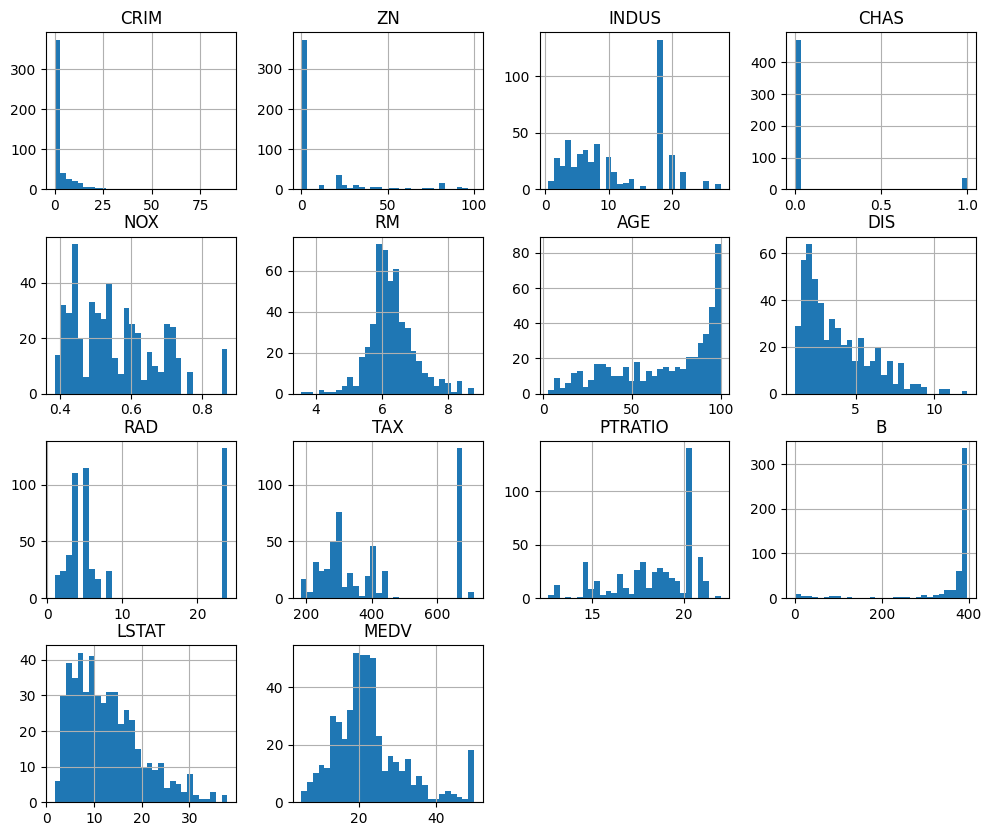

In [35]:
x.hist(figsize=(12, 10), bins=30)
plt.show()


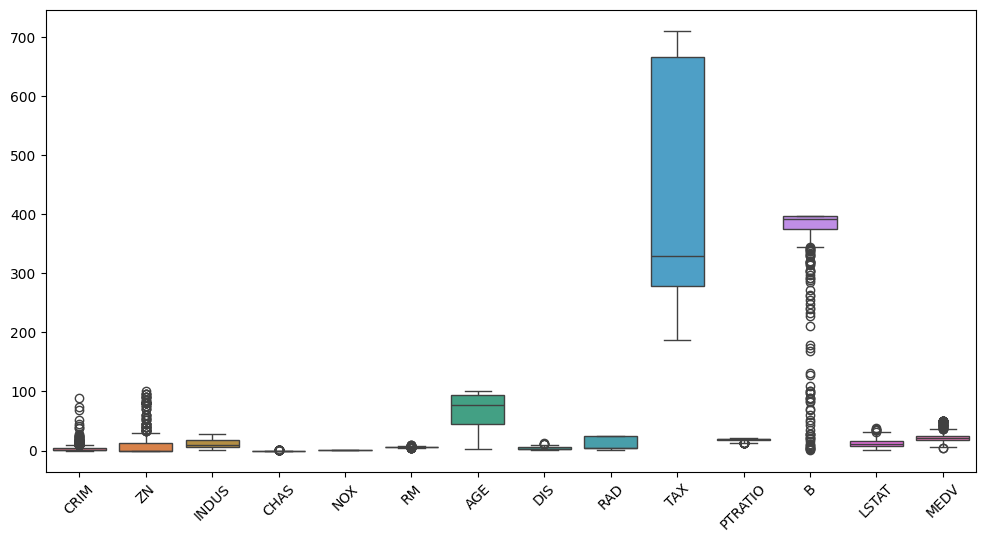

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(data=x)
plt.xticks(rotation=45)
plt.show()


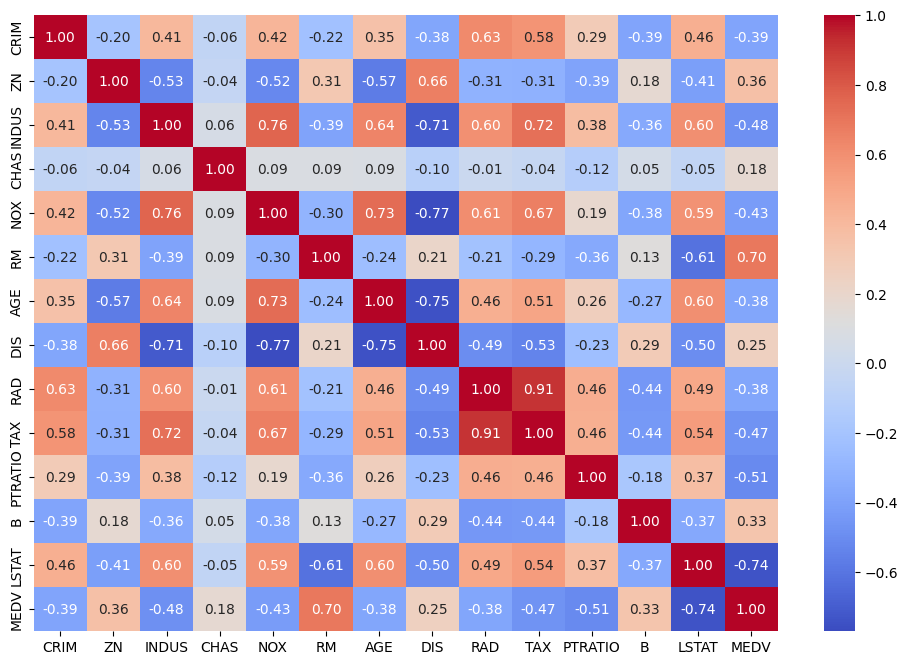

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


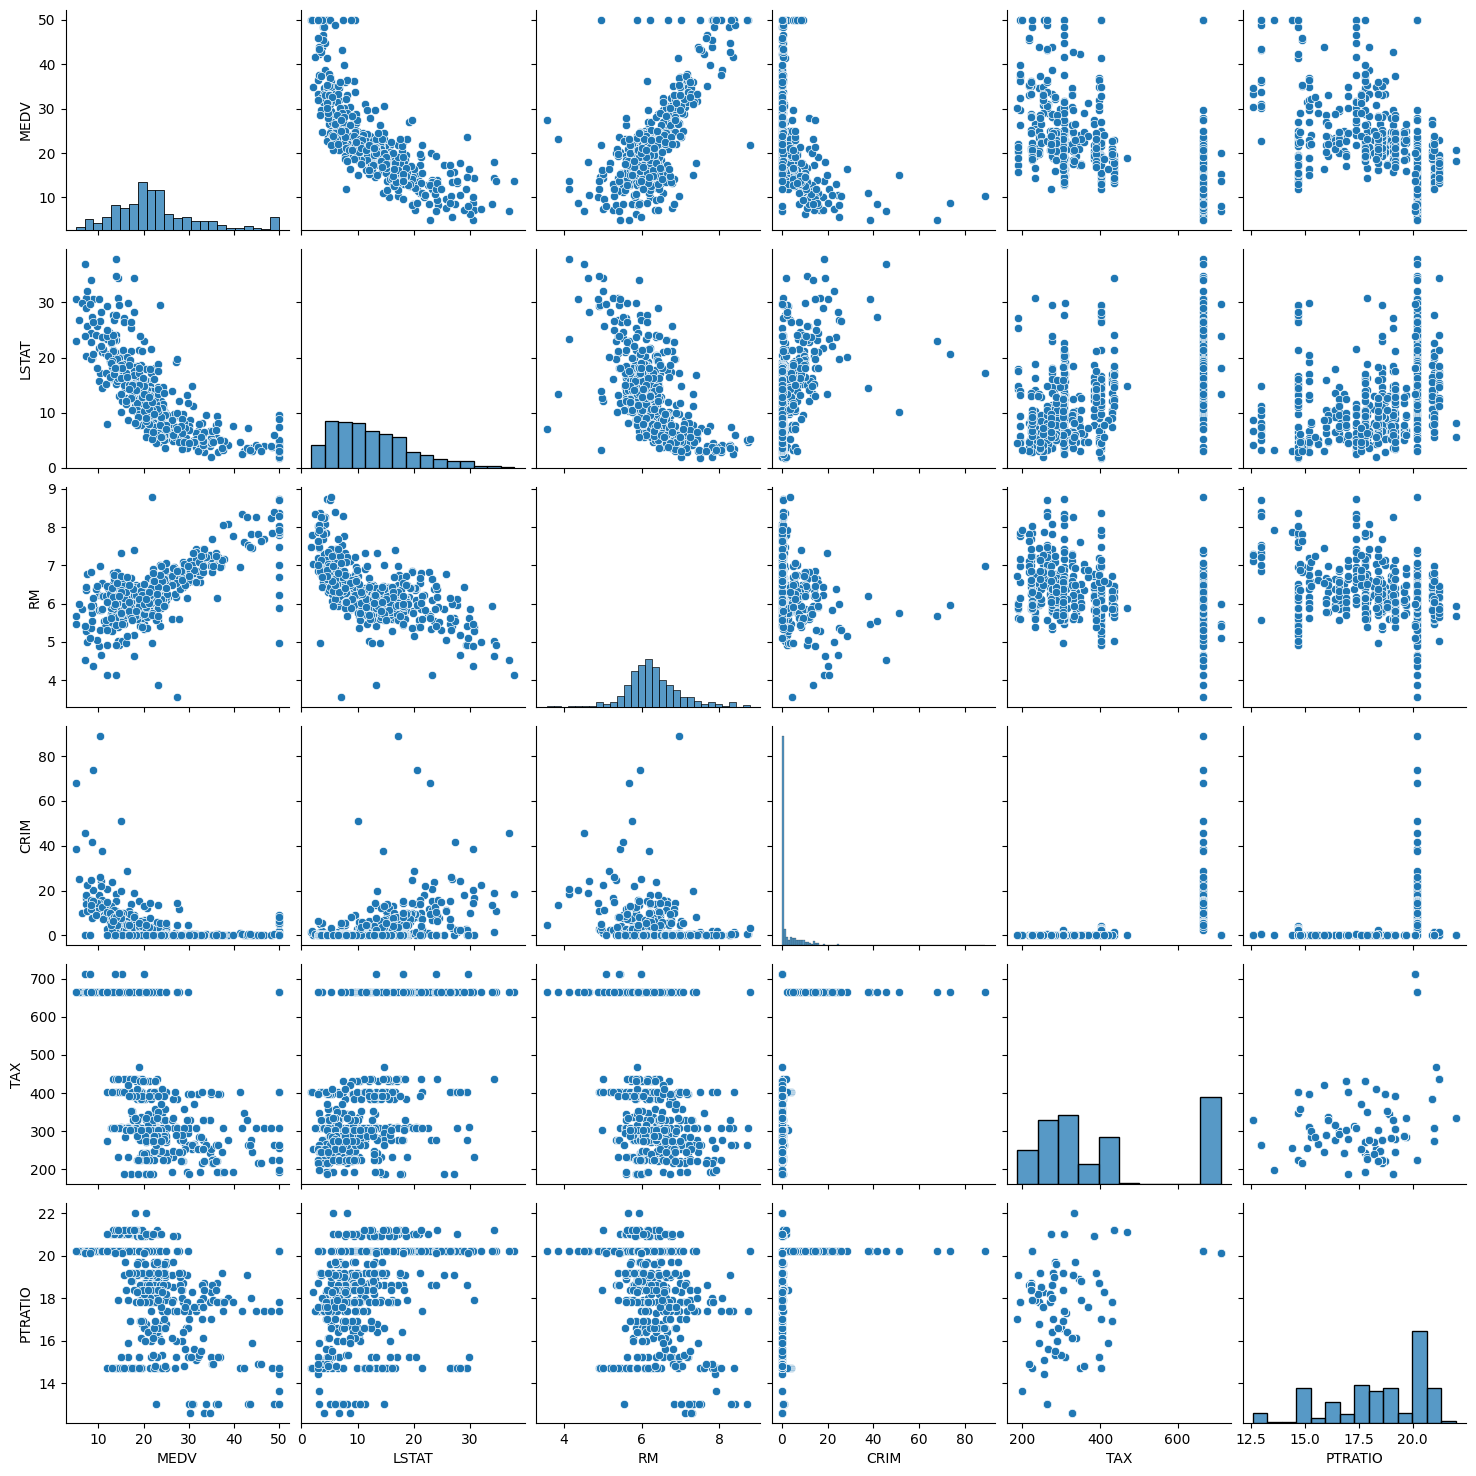

In [38]:
sns.pairplot(x[['MEDV', 'LSTAT', 'RM', 'CRIM', 'TAX', 'PTRATIO']])
plt.show()

In [39]:
z_scores = x.apply(zscore)
outliers = (z_scores > 3) | (z_scores < -3)
outliers.sum()

,0
CRIM,8
ZN,14
INDUS,0
CHAS,35
NOX,0
RM,8
AGE,0
DIS,5
RAD,0
TAX,0


In [40]:
x_cleaned = x[~((z_scores > 3) | (z_scores < -3)).any(axis=1)]


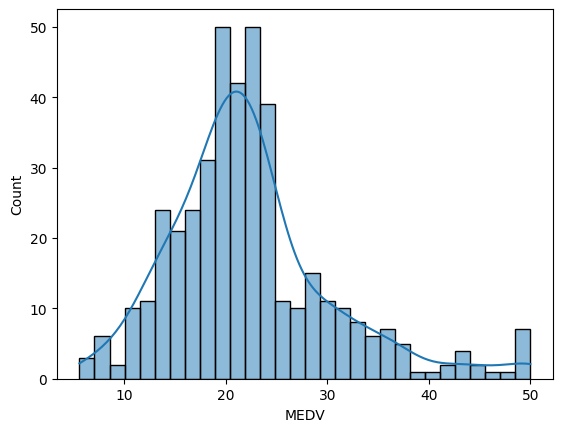

In [41]:
sns.histplot(x_cleaned['MEDV'], kde=True, bins=30)
plt.show()


In [42]:
df=x_cleaned.copy()

In [43]:
X = x_cleaned.drop("MEDV", axis=1).values
y = x_cleaned["MEDV"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=16)

In [44]:
print("Ukuran X train ", len(X_train))
print("Ukuran X test ", len(X_test))
print("Ukuran y train ", len(y_train))
print("Ukuran y test ", len(y_test))

Ukuran X train  332
Ukuran X test  83
Ukuran y train  332
Ukuran y test  83


In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50,100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

# Menampilkan parameter terbaik
print("Best Parameters:", grid_search.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [47]:
# Buat model dengan parameter terbaik
rf_best = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)

# Latih ulang model dengan seluruh data training
rf_best.fit(X_train_scaled, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10, n_estimators=500, random_state=42)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Prediksi pada data uji
y_pred_best = rf_best.predict(X_test_scaled)

# Hitung metrik evaluasi
mae = mean_absolute_error(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best)

# Print hasil evaluasi
print(f"📊 Mean Absolute Error (MAE): {mae:.3f}")
print(f"📊 Mean Squared Error (MSE): {mse:.3f}")
print(f"📊 Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"📊 R-squared (R²): {r2:.3f}")


📊 Mean Absolute Error (MAE): 1.721
📊 Mean Squared Error (MSE): 5.471
📊 Root Mean Squared Error (RMSE): 2.339
📊 R-squared (R²): 0.894


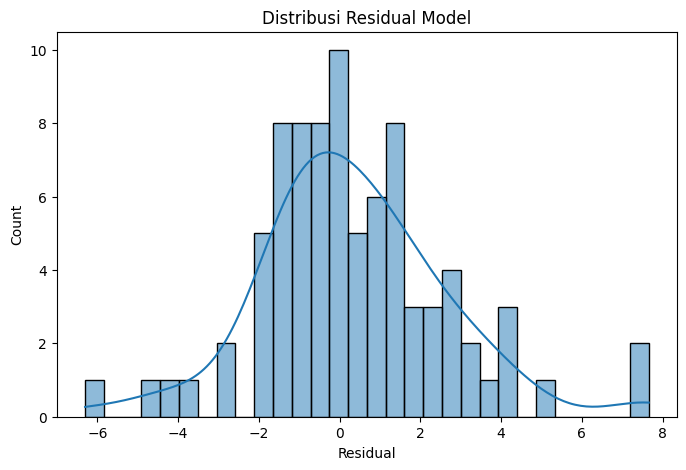

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung residuals
residuals = y_test.ravel() - y_pred_best.ravel()

# Plot distribusi residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residual")
plt.title("Distribusi Residual Model")
plt.show()


In [50]:
df=df.drop('MEDV', axis=1)

13 13


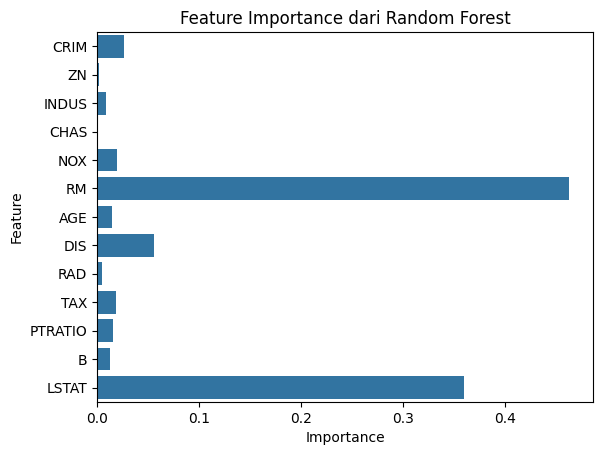

In [51]:
# Simpan nama kolom sebelum scaling
feature_names = df.columns  # Pastikan X masih DataFrame sebelum scaling

# Setelah scaling, tetap gunakan nama fitur yang sudah disimpan
importances = rf_best.feature_importances_
print(len(importances), len(feature_names))

sns.barplot(x=importances, y=feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance dari Random Forest")
plt.show()
